Imports

In [ ]:
! pip install numpy 
! pip install qiskit
! pip install matplotlib

In [42]:
from qiskit import QuantumCircuit, Aer ,BasicAer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

Compsing gates for the Phase Oracle and the Diffuser

In [2]:
def phase_oracle(n,name = 'Of'):
    qc = QuantumCircuit(n, name=name)
    
    qc.mct(list(range(n-1)), n-1)
    
    return qc

In [3]:
def diffuser(n, name='V'):
    qc = QuantumCircuit(n, name=name)
    
    for qb in range(n-1): #first layer of Hadamards in diffuser
        qc.h(qb)
   
    for i in range(n-1):
        qc.x(i)
        
    qc.mct(list(range(n-1)), n-1)
    
    for i in range(n-1):
        qc.x(i)
    
    for qb in range(n-1): #second layer of Hadamards in diffuser
        qc.h(qb)
        
    return qc

Let the size of the problem be n = 4, 
Then total size of quantum register will be n+1, accounting for the ancilla register

In [7]:
n = 2

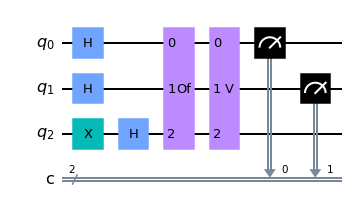

In [9]:
gr = QuantumCircuit(n+1, n)

r = int(np.floor(np.pi/4*np.sqrt(2**(n)))) # Determine r
    
gr.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr.x(n)
gr.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle(n+1), range(n+1))
    gr.append(diffuser(n+1), range(n+1))
        
gr.measure(range(n), range(n))    # step 3: measure all qubits
    
gr.draw('mpl')

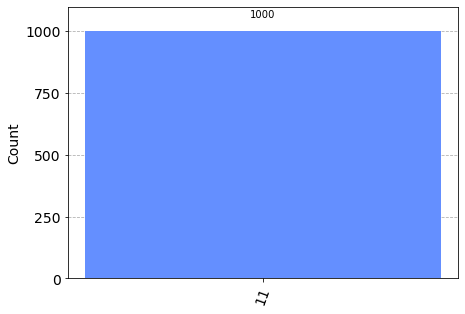

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

Plotting probability of successfully measuring marked state against Grover iterations

In [45]:
n = 4

prob_marked = []


# Returns probability of success
def probability(counts):
    
    key_sol = '1111'
    
    val_sol = counts[key_sol]
    
    val_total = sum(counts.values())

    prob_of_success = val_sol/val_total

    return prob_of_success

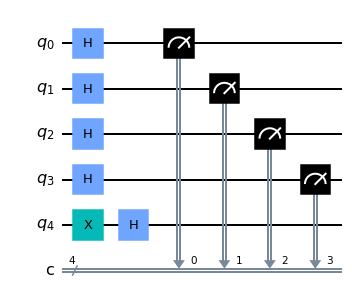

In [15]:
gr0 = QuantumCircuit(n+1, n)

r = 0
    
gr0.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr0.x(n)
gr0.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr1.append(phase_oracle(n+1), range(n+1))
    gr1.append(diffuser(n+1), range(n+1))
        
gr0.measure(range(n), range(n))    # step 3: measure all qubits
    
gr0.draw('mpl')

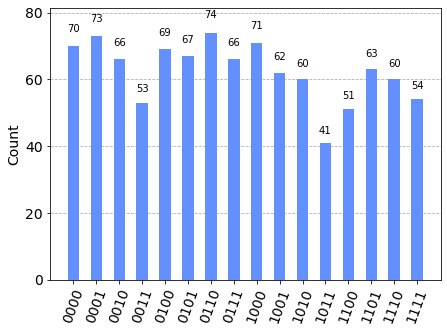

In [46]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr0, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

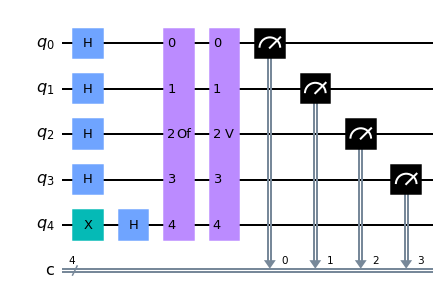

In [33]:
gr1 = QuantumCircuit(n+1, n)

r = 1
    
gr1.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr1.x(n)
gr1.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr1.append(phase_oracle(n+1), range(n+1))
    gr1.append(diffuser(n+1), range(n+1))
        
gr1.measure(range(n), range(n))    # step 3: measure all qubits
    
gr1.draw('mpl')

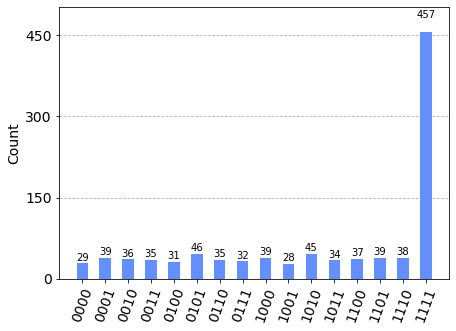

In [47]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr1, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

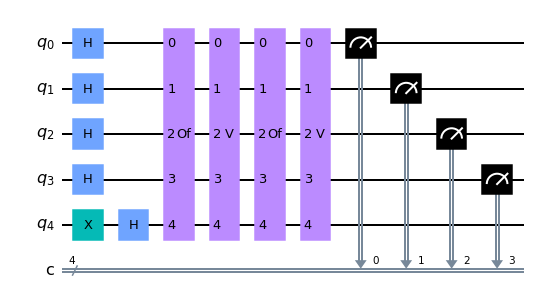

In [35]:
gr2 = QuantumCircuit(n+1, n)

r = 2
    
gr2.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr2.x(n)
gr2.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr2.append(phase_oracle(n+1), range(n+1))
    gr2.append(diffuser(n+1), range(n+1))
        
gr2.measure(range(n), range(n))    # step 3: measure all qubits
    
gr2.draw('mpl')

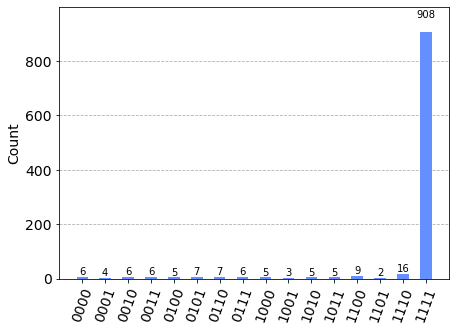

In [48]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr2, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

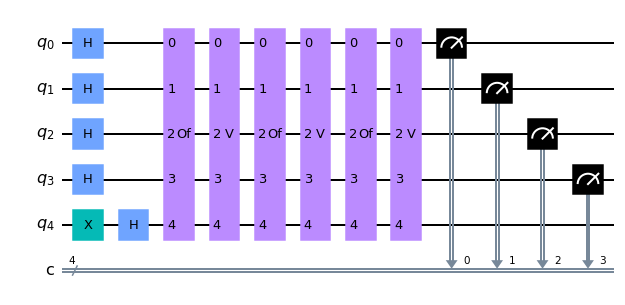

In [37]:
gr3 = QuantumCircuit(n+1, n)

r = 3
    
gr3.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr3.x(n)
gr3.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr3.append(phase_oracle(n+1), range(n+1))
    gr3.append(diffuser(n+1), range(n+1))
        
gr3.measure(range(n), range(n))    # step 3: measure all qubits
    
gr3.draw('mpl')

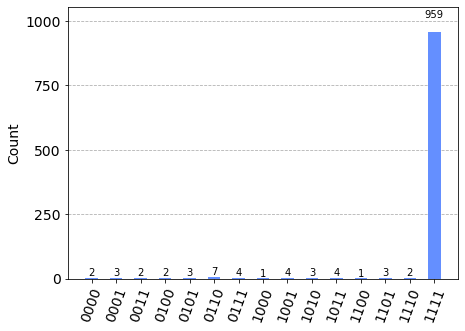

In [49]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr3, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

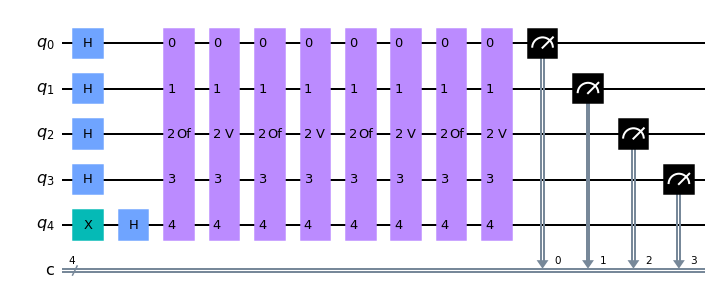

In [39]:
gr4 = QuantumCircuit(n+1, n)

r = 4
    
gr4.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr4.x(n)
gr4.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr4.append(phase_oracle(n+1), range(n+1))
    gr4.append(diffuser(n+1), range(n+1))
        
gr4.measure(range(n), range(n))    # step 3: measure all qubits
    
gr4.draw('mpl')

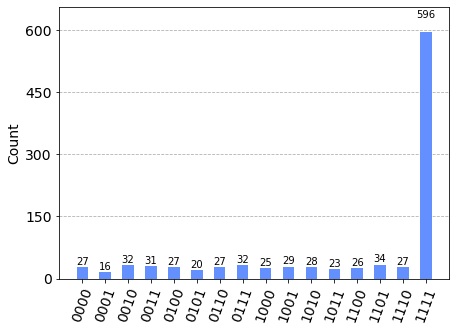

In [50]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr4, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

Plotting the probability of success againt r

Text(0, 0.5, 'Probability of Marked State')

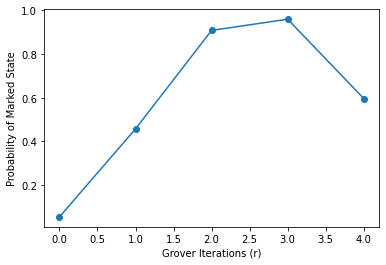

In [51]:
r = [0,1,2,3,4]

plt.plot(r, prob_marked, 'o-')
plt.xlabel("Grover Iterations (r)")
plt.ylabel("Probability of Marked State")